In [1]:
import os
import pandas as pd
import seaborn as sns
from scripts.import_dataset import ImportDataset
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12

In [2]:
data = ImportDataset()
df = data.read_dataset()
print(f"✅ Combined dataset size: {df.shape[0]} samples")

✅ Combined dataset size: 14438 samples


In [6]:
df_labels = pd.read_csv("data/medical_tc_labels.csv")
df_labels.loc[df_labels['condition_label'] == 5, 'condition_label'] = 0
df_labels['name'] = df_labels['condition_name'].str.split(n=1, expand=True)[0]
my_dict = pd.Series(df_labels['name'].values, index=df_labels['condition_label']).to_dict()
df["condition"] = df["condition_label"].map(my_dict)
df.head()

,condition_label,medical_abstract,condition
0,0,Tissue changes around loose prostheses. A cani...,general
1,1,Neuropeptide Y and neuron-specific enolase lev...,neoplasms
2,2,"Sexually transmitted diseases of the colon, re...",digestive
3,1,Lipolytic factors associated with murine and h...,neoplasms
4,3,Does carotid restenosis predict an increased r...,nervous


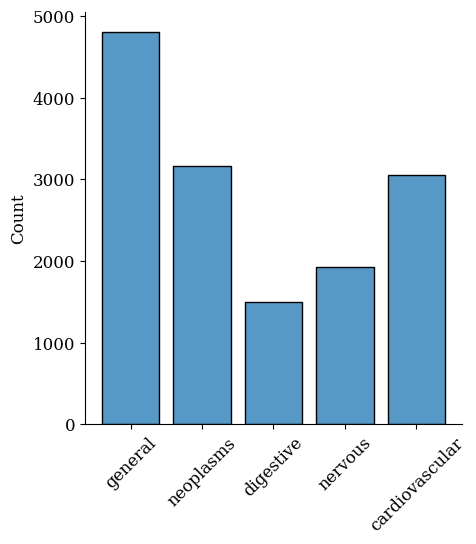

In [7]:
ax1 = sns.displot(df, x='condition', discrete=True, kind="hist", shrink=.8)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabels("")
plt.savefig(os.path.join("plots", "Initial_Analysis.pdf"), bbox_inches='tight')